# Traffic Indicators on I-94 Interstate Highway

In this project, I will be analyzing a dataset regarding westbound traffic on the [I-94 Interstate Highway](https://en.wikipedia.org/wiki/Interstate_94). The goal of this project will be to determine a few indicators of heavy traffic on the I-94, such as weather type, time of day, day of week, etc.

The attributes for this dataset are as follows:
* `holiday`: Categorical US National holidays plus regional holiday, Minnesota State Fair 
* `temp`: Numeric average temperature in Kelvin 
* `rain_1h`: Numeric amount in mm of rain that occurred in the hour 
* `snow_1h`: Numeric amount in mm of snow that occurred in the hour 
* `clouds_all`: Numeric percentage of cloud cover 
* `weather_main`: Categorical short textual description of the current weather 
* `weather_description`: Categorical longer textual description of the current weather 
* `date_time`: DateTime hour of the data collected in local CST time 
* `traffic_volume`: Numeric hourly I-94 ATR 301 reported westbound traffic volume

The full dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [1]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows with 9 columns and no null values. Each row describes traffic and weather data for a specific hour from 2012-10-02 09:00:00 to 2018-09-30 23:00:00.

All of the data in this dataset was recorded at a station located approximately midway between Minneapolis and Saint Paul for westbound traffic only. Thus, any results of this analysis will only apply to westbound traffic in the proximity of that station.

## Exploring Traffic Volume

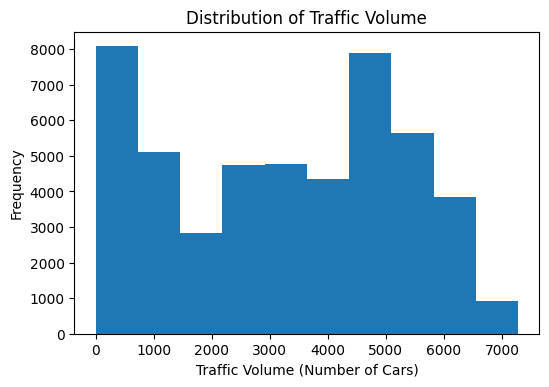

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume (Number of Cars)')
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looking at the distribution of the `traffic_volume` column, hourly traffic ranged between 0 and 7,280 cars, with an average of 3,260 cars.
The distribution is asymmetrical and peaks twice: first in the range between 0 and 728 cars, and again in the range between 4,368 and 5,096 cars. These two peaks might be explained by nighttime vs. daytime traffic volume, respectively.

## Daytime vs. Nighttime Traffic Volume

To distinguish between daytime & nighttime datapoints, I will split the data into two intervals:
* Daytime data: hours from 7:00 am to 7:00 pm
* Nighttime data: hours from 7:00 pm to 7:00 am

These intervals are not ideal, but are simply a launching point.

In [6]:
#converting date_time column to DateTime objects
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

#seperating data into day/night dataframes
day = traffic.copy()[traffic['date_time'].dt.hour.between(7,18)]
night = traffic.copy()[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >= 19)]

print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


The difference in row numbers between `day` and `night` is due to certain hours not being recorded in the dataset.

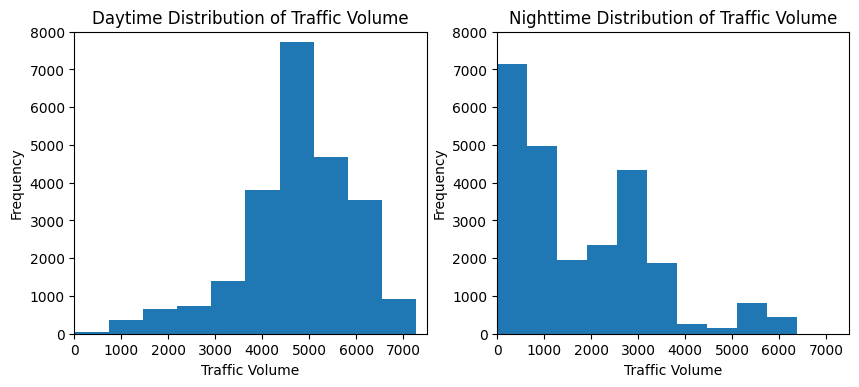

In [7]:
plt.figure(figsize= [10,4])

#day plot
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Daytime Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.xlim([0,7500])

#night plot
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Nighttime Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.xlim([0,7500])

plt.show()

In [8]:
print('Daytime:\n',day['traffic_volume'].describe())
print('\nNighttime:\n',night['traffic_volume'].describe())

Daytime:
 count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Nighttime:
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


The distribution of daytime traffic volume is left skewed, with traffic volume remaining high (4,252 cars or more) 75% of the time. On the other hand, nighttime traffic is much more mild. The distribution is right skewed, with a low traffic volume (fewer than 2,819 cars ) 75% of the time.

Since traffic is generally low at night, and I am looking for heavy traffic indicators, I will focus my analysis on only daytime data moving forward.

## Traffic Volume & Time Indicators

A possible indicator of heavy traffic is time. I'm going to look at how traffic volume is changed according to month, day of week, and time of day.

### Month

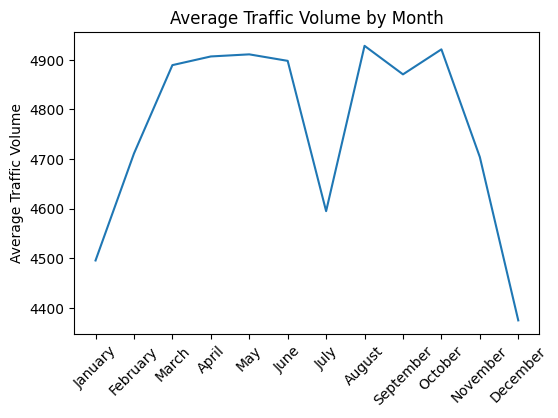

In [9]:
day['month'] = day['date_time'].dt.month 
by_month = day.groupby('month').mean()

by_month['traffic_volume'].plot.line()
plt.title('Average Traffic Volume by Month')
plt.xlabel('')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(1,13),
           ['January','February','March','April','May','June','July','August','September','October','November','December'],
           rotation=45)
plt.show()

Traffic volume seems to be less heavy during the Winter months (November-February), while remaining during the rest of the year. However, there is a strange dip in average traffic volume during the month of July.

Looking specifically at the month of July for each year:

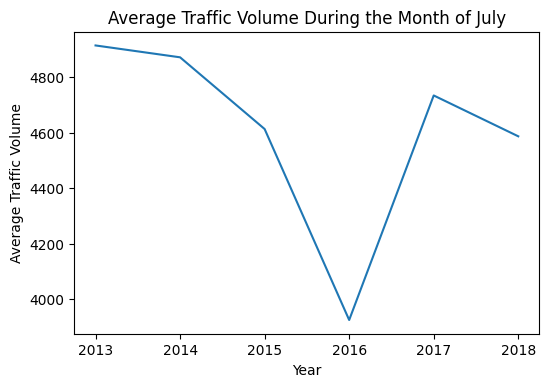

In [10]:
day['year'] = day['date_time'].dt.year
day[day['month']==7].groupby('year').mean()['traffic_volume'].plot.line()
plt.title('Average Traffic Volume During the Month of July')
plt.xlabel('Year')
plt.ylabel('Average Traffic Volume')
plt.show()

Traffic volume remains generally high during the month of July, except for one year during 2016. Such a sharp decrease in volume may be due to construction during that time. [This article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) seems to support that. 

So, barring this period of construction in July 2016, traffic is generally high during non-Winter months.

### Day of Week

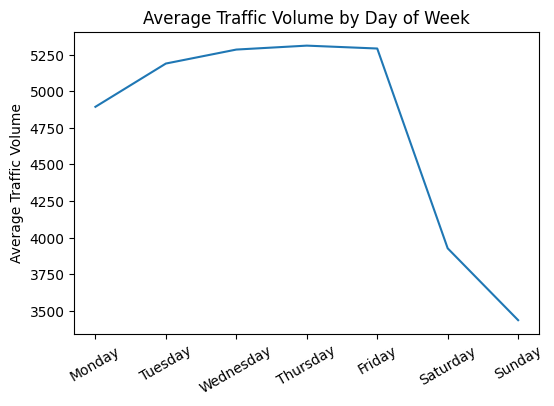

In [11]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()

by_dayofweek['traffic_volume'].plot.line()
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(7),
           ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
           rotation=30)
plt.show()

Traffic volume remains quite high during the work week (Monday-Friday), with the average near 5,000 cars or higher thoughout the week. The traffic volume then takes a sharp dive during the weekend, with average traffic less than 4,000 cars.

### Time of Day: Business Days vs. Weekends

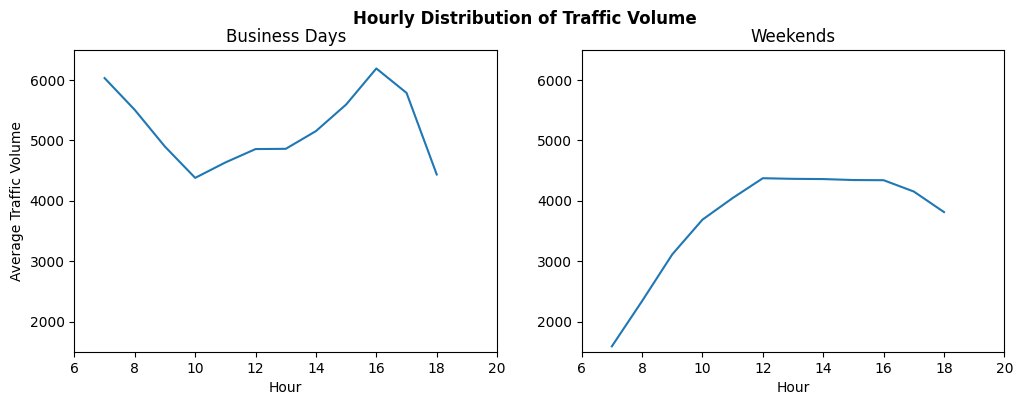

In [12]:
#adding an 'hour' column from 'date_time'
day['hour'] = day['date_time'].dt.hour

#separating business days ('dayofweek'=0-4) & weekends ('dayofweek'=5-6)
business_days = day[day['dayofweek']<5]
weekend = day[day['dayofweek']>=5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


plt.figure(figsize=[12,4])
plt.suptitle('Hourly Distribution of Traffic Volume',weight='bold')

#business day plot
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim([6,20])
plt.xticks([6,8,10,12,14,16,18,20])
plt.ylim([1500,6500])
plt.ylabel('Average Traffic Volume')
plt.xlabel('Hour')
plt.title('Business Days')

#weekend plot
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim([6,20])
plt.xticks([6,8,10,12,14,16,18,20])
plt.ylim([1500,6500])
plt.xlabel('Hour')
plt.title('Weekends')

plt.show()

Average traffic volume is generally higher on business days than on weekends at all hours of the day. Hours of peak traffic on business days are at 7 AM and 4 PM. This is not surprising, as these hours coincide with the beginning and end of the average work day.

---
To summarize my findings regarding traffic volume and time indicators:
* Traffic is generally heavier in warmer months (March-October) than in colder months (November-February).
* Traffic is generally heavier during the work week (Monday-Friday) than on weekends.
* Occasions of peak, or "rush hour" traffic during the work week tend to occur around 7 AM and 4 PM.

## Weather Indicators

Another possible indicator of heavy traffic is weather. Such columns indicating weather are `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, and `weather_description`.

### Numerical Weather-Related Columns

In [13]:
#correlation w/ only weather related columns
day.corr()['traffic_volume'][:4]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

Looking at the correlation between `traffic_volume` and numerical weather-related columns, `temp` seems to have the strongest correlation. However, its value is only about 0.13.

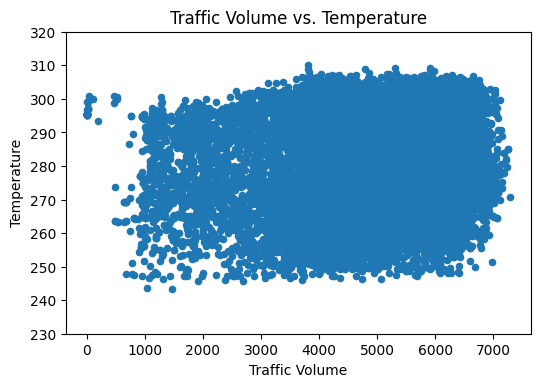

In [14]:
day.plot.scatter('traffic_volume','temp')
plt.ylim([230,320])
plt.ylabel('Temperature')
plt.xlabel('Traffic Volume')
plt.title('Traffic Volume vs. Temperature')
plt.show()

While there exists a positive correlation between traffic volume and temperature, clearly that correlation is extremely weak. Since the other numerical weather-related columns have an even weaker correlation, it is safe to say that none of these columns are good indicators of heavy traffic.

*Note: Two datapoints were incorrectly labeled with a temperature value of 0. These points have been omitted from the above scatter plot.*

### Categorical Weather-Related Columns

The two categorical weather related columns are `weather_main` and `weather_description`. 

Looking first at `weather_main`:

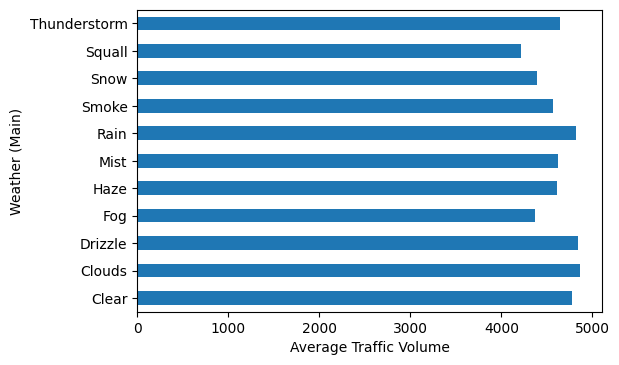

In [15]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather (Main)')
plt.show()

The `weather_main`column does not seem to have any clear indicators of heavy traffic, with all values holding between 4,000 and 5,000 average traffic volume.

Looking at the more granular `weather_description` column:

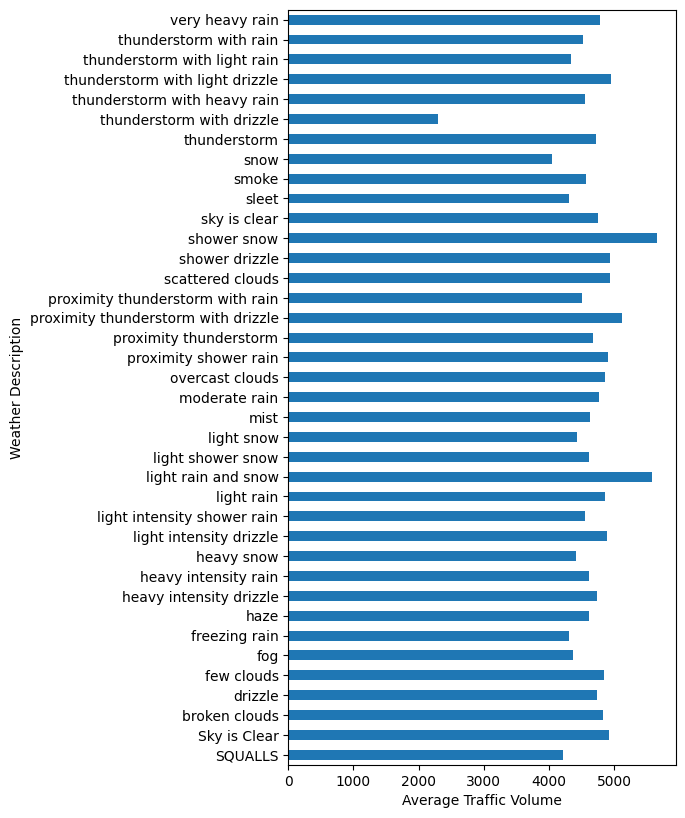

In [16]:
plt.figure(figsize=(5,10))
by_weather_description['traffic_volume'].plot.barh()
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

There are three types of weather that have an average traffic volume exceeding 5,000:
* Thunderstorm w/ light drizzle
* Shower snow
* Light rain & snow

It is not entirely clear why these weather patterns generated a higher average traffic volume. While these are not particularly good driving conditions, nor are they terribly bad conditions either.

---
## Conclusion

Overall, I found two types of heavy traffic indicators on the I-94 Interstate highway:
* Time indicators:
    * Traffic is generally heavier in warmer months (March-October) than in colder months (November-February).
    * Traffic is generally heavier during the work week (Monday-Friday) than on weekends.
    * Occasions of peak, or "rush hour" traffic during the work week tend to occur around 7 AM and 4 PM.
* Weather indicators:
    * Thunderstorm w/ light drizzle
    * Shower snow
    * Light rain & snow